In [1]:
import pandas as pd

df = pd.read_csv('Survived.csv')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [2]:
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [4]:
df.isna().any(axis=0)

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [7]:
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

x = df[col]
t = df['Survived']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size = 0.2, random_state = 0)
x_train.shape

(712, 5)

In [9]:
model = tree.DecisionTreeClassifier(max_depth = 5, random_state = 0, class_weight = 'balanced')
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)

In [10]:
model.score(X = x_test, y = y_test)

0.7374301675977654

In [13]:
def learn(x,t,depth=3):
    x_train, x_test, y_train, y_test = train_test_split(x,t,test_size = 0.2, random_state = 0)
    
    model = tree.DecisionTreeClassifier(max_depth = depth, random_state = 0, class_weight = 'balanced')
    model.fit(x_train, y_train)
    
    score = model.score(X = x_train, y = y_train)
    score2 = model.score(X = x_test, y = y_test)
    return round(score, 3), round(score2, 3), model

In [14]:
for j in range(1,15):
    train_score, test_score, model = learn(x, t, depth = j)
    sentence = '訓練データの正解率{}'
    sentence2 = 'テストデータの正解率{}'
    total_sentence = '深さ{}:' + sentence+sentence2
    print(total_sentence.format(j, train_score, test_score))

深さ1:訓練データの正解率0.659テストデータの正解率0.704
深さ2:訓練データの正解率0.699テストデータの正解率0.732
深さ3:訓練データの正解率0.704テストデータの正解率0.737
深さ4:訓練データの正解率0.698テストデータの正解率0.726
深さ5:訓練データの正解率0.722テストデータの正解率0.737
深さ6:訓練データの正解率0.77テストデータの正解率0.698
深さ7:訓練データの正解率0.771テストデータの正解率0.648
深さ8:訓練データの正解率0.781テストデータの正解率0.631
深さ9:訓練データの正解率0.83テストデータの正解率0.704
深さ10:訓練データの正解率0.851テストデータの正解率0.687
深さ11:訓練データの正解率0.878テストデータの正解率0.676
深さ12:訓練データの正解率0.892テストデータの正解率0.654
深さ13:訓練データの正解率0.909テストデータの正解率0.654
深さ14:訓練データの正解率0.92テストデータの正解率0.654


In [16]:
df2 = pd.read_csv('Survived.csv')

In [17]:
print(df2['Age'].mean())
print(df2['Age'].median())

29.69911764705882
28.0


In [18]:
df2.groupby('Survived').mean()['Age']

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [19]:
df2.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [20]:
pd.pivot_table(df2, index = 'Survived', columns = 'Pclass', values  = 'Age')

Pclass,1,2,3
Survived,,,
0,43.695312,33.544444,26.555556
1,35.368197,25.901566,20.646118


In [22]:
pd.pivot_table(df2, index = 'Survived', columns = 'Pclass', values = 'Age', aggfunc = max)

Pclass,1,2,3
Survived,,,
0,71.0,70.0,74.0
1,80.0,62.0,63.0


In [50]:
df3 = pd.read_csv('Survived.csv')
is_null = df3['Age'].isnull()

df3.loc[(df3['Pclass'] == 1) & (df3['Survived'] == 0) & (is_null), 'Age'] = 43
df3.loc[(df3['Pclass'] == 1) & (df3['Survived'] == 1) & (is_null), 'Age'] = 35

df3.loc[(df3['Pclass'] == 2) & (df3['Survived'] == 0) & (is_null), 'Age'] = 33
df3.loc[(df3['Pclass'] == 2) & (df3['Survived'] == 1) & (is_null), 'Agg'] = 25

df3.loc[(df3['Pclass'] == 3) & (df3['Survived'] == 0) & (is_null), 'Age'] = 26
df3.loc[(df3['Pclass'] == 3) & (df3['Survived'] == 1) & (is_null), 'Age'] = 20


In [52]:
df3['Age'] = df['Age'].fillna(df['Age'].mean())

In [53]:
df3.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Agg            887
dtype: int64

In [54]:
col =['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
x = df3[col]
t = df3['Survived']

for j in range(1,15):
    s1, s2, m = learn(x, t, depth = j)
    sentence = '深さ{}:　訓練データの精度{}: テストデータの精度{}'
    print(sentence.format(j, s1, s2))

深さ1:　訓練データの精度0.659: テストデータの精度0.704
深さ2:　訓練データの精度0.699: テストデータの精度0.732
深さ3:　訓練データの精度0.704: テストデータの精度0.737
深さ4:　訓練データの精度0.698: テストデータの精度0.726
深さ5:　訓練データの精度0.722: テストデータの精度0.737
深さ6:　訓練データの精度0.77: テストデータの精度0.698
深さ7:　訓練データの精度0.771: テストデータの精度0.648
深さ8:　訓練データの精度0.781: テストデータの精度0.631
深さ9:　訓練データの精度0.83: テストデータの精度0.704
深さ10:　訓練データの精度0.851: テストデータの精度0.687
深さ11:　訓練データの精度0.878: テストデータの精度0.676
深さ12:　訓練データの精度0.892: テストデータの精度0.654
深さ13:　訓練データの精度0.909: テストデータの精度0.654
深さ14:　訓練データの精度0.92: テストデータの精度0.654


In [55]:
sex = df3.groupby('Sex').mean()
sex

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Agg
Sex,,,,,,,,
female,431.028662,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818,25.0
male,454.147314,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893,25.0


<AxesSubplot:xlabel='Sex'>

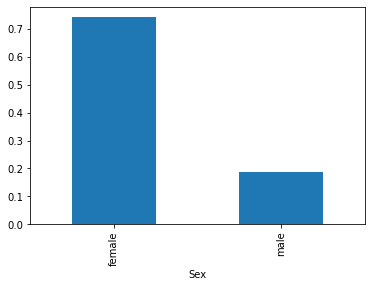

In [36]:
sex['Survived'].plot(kind='bar')

In [56]:
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']

x = df3[col]
t = df3['Survived']

train_score, test_score, model = learn(x, t)

ValueError: could not convert string to float: 'female'

In [57]:
male = pd.get_dummies(df3['Sex'], drop_first = True)
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [58]:
x_temp = pd.concat([x,male], axis = 1)

x_temp.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,male
0,3,22.0,1,0,7.2500,male,1
1,1,38.0,1,0,71.2833,female,0
2,3,26.0,0,0,7.9250,female,0
3,1,35.0,1,0,53.1000,female,0
4,3,35.0,0,0,8.0500,male,1


In [59]:
x_new = x_temp.drop('Sex',axis = 1)

for j in range(1,6):
    s1, s2, m = learn(x_new, t, depth= j)
    s = '深さ{}:訓練データ{}: :テストデータ{}'
    print(s.format(j, s1, s2))

深さ1:訓練データ0.787: :テストデータ0.788
深さ2:訓練データ0.792: :テストデータ0.782
深さ3:訓練データ0.834: :テストデータ0.821
深さ4:訓練データ0.843: :テストデータ0.816
深さ5:訓練データ0.824: :テストデータ0.821


In [67]:
s1, s2, model = learn(x_new, t, depth = 5)

import pickle
with open('surciced.pkl', 'wb') as f:
    pickle.dump(model,f)

In [68]:
model.feature_importances_

array([0.12954144, 0.15858595, 0.05979857, 0.01243679, 0.09689659,
       0.54274068])

In [69]:
pd.DataFrame(model.feature_importances_, index=x_new.columns)

,0
Pclass,0.129541
Age,0.158586
SibSp,0.059799
Parch,0.012437
Fare,0.096897
male,0.542741


In [70]:
smp = pd.read_csv('ex4.csv')
smp

,class,dept_id,sex,score
0,3,0,1,60.170169
1,3,5,1,86.610078
2,2,6,1,69.761279
3,2,5,1,62.597242
4,0,1,0,73.777754
...,...,...,...,...
295,3,4,0,78.099285
296,4,1,0,54.043671
297,2,3,1,74.705880
298,2,2,0,60.102534


In [79]:
mf = smp.loc[smp['sex']==0]


,class,dept_id,sex,score
4,0,1,0,73.777754
5,3,4,0,54.003020
8,2,6,0,82.700072
9,0,5,0,63.581411
10,4,5,0,70.937780
...,...,...,...,...
291,1,4,0,65.213374
293,2,4,0,77.878714
295,3,4,0,78.099285
296,4,1,0,54.043671


<AxesSubplot:xlabel='sex'>

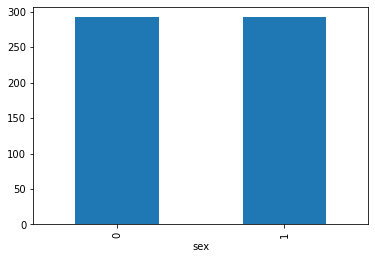

In [74]:
mf['class'].plot(kind='bar')

In [80]:
smp.describe()

,class,dept_id,sex,score
count,300.000000,300.000000,300.000000,300.000000
mean,1.946667,2.950000,0.513333,69.414212
std,1.360143,1.973275,0.500657,10.093158
min,0.000000,0.000000,0.000000,41.063359
25%,1.000000,1.000000,0.000000,61.953753
50%,2.000000,3.000000,1.000000,69.256455
75%,3.000000,5.000000,1.000000,76.952404
max,4.000000,6.000000,1.000000,99.925980


In [81]:
list_ =[0,1,2,3,4]

In [83]:
mean = smp.groupby('class').mean()['score']
mean

class
0    68.850195
1    69.510764
2    71.611092
3    67.572909
4    68.814253
Name: score, dtype: float64

In [86]:
pd.pivot_table(smp, index = 'sex', columns ='class', values='score', aggfunc = 'mean')

class,0,1,2,3,4
sex,,,,,
0,68.358569,67.472218,71.704884,63.897676,69.952314
1,69.274011,71.379432,71.532109,72.013815,67.676191


In [89]:
dummies = pd.get_dummies(smp['dept_id'], drop_first=True)
dummies

,1,2,3,4,5,6
0,0,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,0,1,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
295,0,0,0,1,0,0
296,1,0,0,0,0,0
297,0,0,1,0,0,0
298,0,1,0,0,0,0


In [90]:
tmp = pd.concat([smp, dummies], axis=1)
tmp

,class,dept_id,sex,score,1,2,3,4,5,6
0,3,0,1,60.170169,0,0,0,0,0,0
1,3,5,1,86.610078,0,0,0,0,1,0
2,2,6,1,69.761279,0,0,0,0,0,1
3,2,5,1,62.597242,0,0,0,0,1,0
4,0,1,0,73.777754,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
295,3,4,0,78.099285,0,0,0,1,0,0
296,4,1,0,54.043671,1,0,0,0,0,0
297,2,3,1,74.705880,0,0,1,0,0,0
298,2,2,0,60.102534,0,1,0,0,0,0


In [91]:
smp1 = tmp.drop('dept_id',axis=1)
smp1

,class,sex,score,1,2,3,4,5,6
0,3,1,60.170169,0,0,0,0,0,0
1,3,1,86.610078,0,0,0,0,1,0
2,2,1,69.761279,0,0,0,0,0,1
3,2,1,62.597242,0,0,0,0,1,0
4,0,0,73.777754,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
295,3,0,78.099285,0,0,0,1,0,0
296,4,0,54.043671,1,0,0,0,0,0
297,2,1,74.705880,0,0,1,0,0,0
298,2,0,60.102534,0,1,0,0,0,0


In [92]:
col = ['class', 'sex']

x = smp1[col]
t = smp1['score']

In [106]:
x_train, x_test, y_train,y_test = train_test_split(x,t,test_size=0.3, random_state=0)
x_train.shape

(210, 2)

In [107]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [108]:
model.score(x_test, y_test)

0.009363640028367093

In [109]:
from sklearn.metrics import mean_absolute_error

pred = model.predict(x_test)

mean_absolute_error(y_pred = pred, y_true = y_test)

8.70683394646142

In [110]:
tmp = pd.DataFrame(model.coef_)
tmp.index = x_train.columns
tmp

,0
class,-0.313902
sex,2.067903


In [119]:
data = [[6, 3]]
answer = model.predict(data)
answer        

array([73.21761915])